# 2. Building predicion model

## 2.1 Data import and preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\data\\df_train.csv')
df_test = pd.read_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\data\\new_test.csv')
df_Kaggle = pd.read_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\data\\df_test.csv')

In [3]:
# df_train = df_train.drop('Survival_rate', axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Age,Family_size,Ticket_frequency,Survival_rate,Fare_per_person,Sex_2,Embarked_2,Embarked_3,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,Deck_9
0,1,0,3,22.0,2,1,0.00,7.25000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1,1,38.0,2,2,0.25,35.64165,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,26.0,1,1,1.00,7.92500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,1,1,35.0,2,2,0.25,26.55000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,35.0,1,1,0.00,8.05000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# df_Kaggle = df_Kaggle.drop('Survival_rate', axis=1)
df_Kaggle.head()

,PassengerId,Survived,Pclass,Age,Family_size,Ticket_frequency,Survival_rate,Fare_per_person,Sex_2,Embarked_2,Embarked_3,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,Deck_9
0,892,0,3,34.5,1,1,0.00,7.82920,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,893,1,3,47.0,2,1,0.00,7.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,894,0,2,62.0,1,1,0.00,9.68750,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,895,0,3,27.0,1,1,0.00,8.66250,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,896,1,3,22.0,3,2,0.25,6.14375,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
drop_columns=['PassengerId', 'Survived']
X = df_train.drop(columns=drop_columns)
y = df_train['Survived']

I will split train data into train and test set in order to check quality of prediction on test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_Kaggle = sc.transform(df_Kaggle.drop(columns=drop_columns))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('t_test shape: {}'.format(y_test.shape))

X_train shape: (712, 17)
y_train shape: (712,)
X_test shape: (179, 17)
t_test shape: (179,)


In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def report(y_pred):
    print(classification_report(y_test, y_pred))
    print('\n')
    print(confusion_matrix(y_test, y_pred))

In [10]:
def save(y_pred, name):
    submission = pd.DataFrame({
            "PassengerId": df_Kaggle["PassengerId"],
            "Survived": y_pred
            },dtype=np.int32)
    submission.to_csv('data\\' + name, index=False)
    return submission

## 2.2. Logistic regression

Since our goal is to predict 1 of 2 output results logistic regression model is my first choice.

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_logreg_Kaggle = logmodel.predict(X_Kaggle)

y_pred_logreg = logmodel.predict(X_test)

In [13]:
report(y_pred_logreg)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       106
           1       0.97      0.92      0.94        73

    accuracy                           0.96       179
   macro avg       0.96      0.95      0.95       179
weighted avg       0.96      0.96      0.96       179



[[104   2]
 [  6  67]]


In [14]:
submission = save(y_logreg_Kaggle,'submission_logreg.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [15]:
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print(acc_logreg)

0.9553072625698324


## 2.3 Random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
y_rfc_Kaggle = rfc.predict(X_Kaggle)

In [18]:
report(y_pred_rfc)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       106
           1       0.96      0.93      0.94        73

    accuracy                           0.96       179
   macro avg       0.96      0.95      0.95       179
weighted avg       0.96      0.96      0.96       179



[[103   3]
 [  5  68]]


In [19]:
submission = save(y_rfc_Kaggle,'submission_rfc.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [20]:
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print(acc_rfc)

0.9553072625698324


## 2.4 Decision tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

y_pred_dtree = dtree.predict(X_test)
y_dtree_Kaggle = dtree.predict(X_Kaggle)

In [22]:
report(y_pred_dtree)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       106
           1       0.99      0.92      0.95        73

    accuracy                           0.96       179
   macro avg       0.97      0.95      0.96       179
weighted avg       0.96      0.96      0.96       179



[[105   1]
 [  6  67]]


In [23]:
submission = save(y_dtree_Kaggle,'submission_dtree.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [24]:
acc_dtree = accuracy_score(y_test, y_pred_dtree)
print(acc_dtree)

0.9608938547486033


## 2.5 Stochastic gradient descent

In [25]:
from sklearn.linear_model import SGDClassifier

In [26]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)
y_sgd_Kaggle = sgd.predict(X_Kaggle)

In [27]:
report(y_pred_sgd)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       106
           1       0.96      0.90      0.93        73

    accuracy                           0.94       179
   macro avg       0.95      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179



[[103   3]
 [  7  66]]


In [28]:
submission = save(y_sgd_Kaggle,'submission_sgd.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [29]:
acc_sgd = accuracy_score(y_test, y_pred_sgd)
print(acc_sgd)

0.9441340782122905


## 2.6 Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_nb_Kaggle = nb.predict(X_Kaggle)

In [32]:
report(y_pred_nb)

              precision    recall  f1-score   support

           0       0.93      0.49      0.64       106
           1       0.56      0.95      0.70        73

    accuracy                           0.68       179
   macro avg       0.74      0.72      0.67       179
weighted avg       0.78      0.68      0.67       179



[[52 54]
 [ 4 69]]


In [33]:
submission = save(y_nb_Kaggle,'submission_nb.csv')
submission.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,0
4,896,1


In [34]:
acc_nb = accuracy_score(y_test, y_pred_nb)
print(acc_nb)

0.6759776536312849


## 2.7 Support Vector Classifier

In [35]:
from sklearn.svm import SVC

In [36]:
svc = SVC(C=0.1, gamma=1, kernel='linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
y_svc_Kaggle = svc.predict(X_Kaggle)

In [37]:
report(y_pred_svc)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       106
           1       0.94      0.92      0.93        73

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179



[[102   4]
 [  6  67]]


In [38]:
submission = save(y_svc_Kaggle,'submission_svc.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [39]:
acc_svc = accuracy_score(y_test, y_pred_svc)
print(acc_svc)

0.9441340782122905


### Grid search

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'C': [0.1,1, 10, 100,], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.972, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.937, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.986, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.972, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.965, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.972, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.965, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.958, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.951, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.986, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.965, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.972, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.958, total=   0.0s
[CV] 

[CV] ... C=100, gamma=0.001, kernel=linear, score=0.986, total=   0.1s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.972, total=   0.1s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.958, total=   0.1s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.2s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             verbose=3)

In [42]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [43]:
grid.best_estimator_

SVC(C=0.1, gamma=1, kernel='linear')

In [44]:
y_pred_grid_svc = grid.predict(X_test)
y_grid_svc_Kaggle = grid.predict(X_Kaggle)

In [45]:
report(y_pred_grid_svc)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       106
           1       0.94      0.92      0.93        73

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179



[[102   4]
 [  6  67]]


In [46]:
acc_grid_svc = accuracy_score(y_test, y_pred_grid_svc)
print(acc_grid_svc)

0.9441340782122905


With found values of C and gamma preciction is only a little better than with default parameters.

# 2.8 KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

To chose the proper k value I repeat calculations for several k values and I choose the value with minimum error rate. 

In [48]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

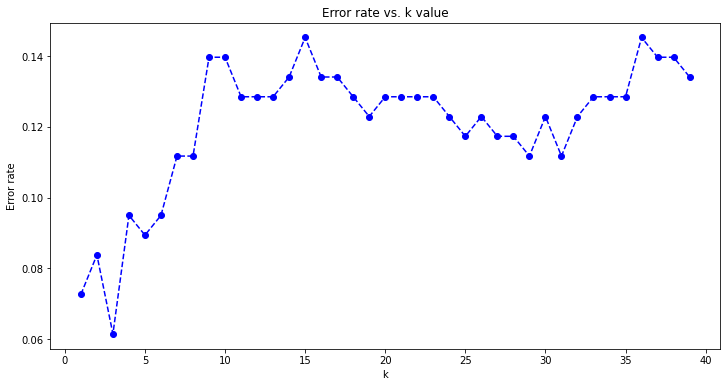

In [49]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error_rate, color='blue',linestyle = 'dashed', marker='o')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.title('Error rate vs. k value')
plt.show()

Since in general kNN with k=1 implies over-fitting, I choose k=3

In [50]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_knn_Kaggle = knn.predict(X_Kaggle)

In [51]:
report(y_pred_knn)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       106
           1       0.94      0.90      0.92        73

    accuracy                           0.94       179
   macro avg       0.94      0.93      0.94       179
weighted avg       0.94      0.94      0.94       179



[[102   4]
 [  7  66]]


In [52]:
submission = save(y_knn_Kaggle,'submission_knn.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [53]:
acc_knn = accuracy_score(y_test, y_pred_knn)
print(acc_knn)

0.9385474860335196


## Prediction results sumarry

In [54]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Random forest', 'Decision tree', 'Stochastic gradient descent', 
             'Naive Bayes', 'Support Vector Classifier', 'KNN'],
    'Score': [acc_logreg, acc_rfc, acc_dtree, acc_sgd, 
             acc_nb, acc_grid_svc, acc_knn]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
Decision tree,0.960894
Logistic Regression,0.955307
Random forest,0.955307
Stochastic gradient descent,0.944134
Support Vector Classifier,0.944134
KNN,0.938547
Naive Bayes,0.675978


### Results of predictions on Kaggle test set

In [55]:
# results before changing feature extraction (before add "Survival_Rate_NA")
results = pd.DataFrame({
    'Model': ['Logistic Regression','Random forest', 'Decision tree', 'Stochastic gradient descent', 
             'Naive Bayes', 'Support Vector Classifier', 'KNN','gender submission'],
    'Score': [0.75119, 0.74641, 0.74162, 0.72966, 
             0.73684, 0.73923, 0.78229, 0.76555]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
KNN,0.78229
gender submission,0.76555
Logistic Regression,0.75119
Random forest,0.74641
Decision tree,0.74162
Support Vector Classifier,0.73923
Naive Bayes,0.73684
Stochastic gradient descent,0.72966


In [56]:
# results after changing feature extraction (after add "Survival_Rate_NA")
results = pd.DataFrame({
    'Model': ['Logistic Regression','Random forest', 'Decision tree', 'Stochastic gradient descent', 
             'Naive Bayes', 'Support Vector Classifier', 'KNN','gender submission'],
    'Score': [0.73444, 0.74880, 0.69856, 0.73205, 
             0.39234, 0.74162, 0.73684, 0.76555]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
gender submission,0.76555
Random forest,0.74880
Support Vector Classifier,0.74162
KNN,0.73684
Logistic Regression,0.73444
Stochastic gradient descent,0.73205
Decision tree,0.69856
Naive Bayes,0.39234


After checking all generated submission datasets I see huge discrepacy between results on Kaggle webside and on test set. It is due to the fact, that feature 'Survived_rate' for original train set used to make train_test_split and further model evaluation is calculated based mostly on well known 'Survived' feature in train set. The values of 'Survived_rate' for real test set are evaluated on the basis of known values from train set and sometimes estimation is not working well.
Only KNN works better than simple gender submission. It indicates that I did sth wrong during feature engineering, I have to look at that later.

## K-fold cross validation

In [57]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100,oob_score=True)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.98611111 0.94444444 0.90140845 0.94366197 1.         0.98591549
 0.98591549 1.         1.         0.95774648]
Mean: 0.97052034428795
Standard Deviation: 0.031088894663551848


In [58]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rf

0.9553072625698324

In [59]:
rf.score(X_train, y_train)

acc_random_forest = round(rf.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [60]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.T

feature,Survival_rate,Sex_2,Age,Fare_per_person,Ticket_frequency,Pclass,Family_size,Deck_8,Embarked_3,Deck_2,Deck_3,Deck_5,Deck_4,Embarked_2,Deck_6,Deck_7,Deck_9
importance,0.593,0.148,0.065,0.055,0.033,0.031,0.027,0.022,0.007,0.004,0.004,0.004,0.003,0.003,0.001,0.0,0.0


<AxesSubplot:xlabel='feature'>

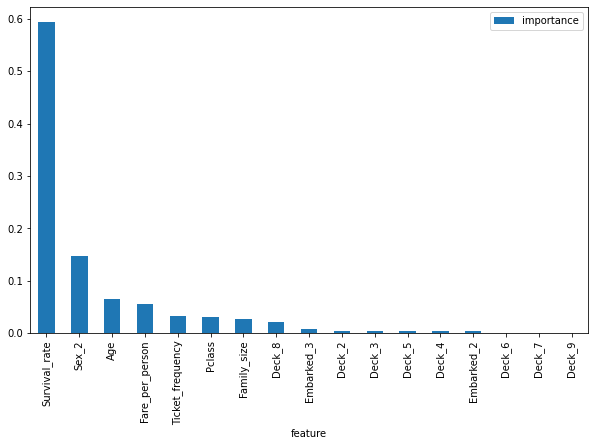

In [61]:
importances.plot.bar(figsize=(10,6))